## phân tích dữ liệu các môn tự nhiên

In [1]:
!which python 

/home/bachtung/miniconda3/envs/p4ds-env/bin/python


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
point_df = pd.read_csv('diemthi2019_update.csv') 
point_df.head()

,Unnamed: 0,SBD,Ngu Van,Toan Hoc,Ma Ngoai Ngu,Ngoai Ngu,Vat Ly,Hoa Hoc,Sinh Hoc,Lich Su,Dia Ly,GDCD
0,0,24008611,8.00,8.2,N1,7.6,NaN,NaN,NaN,8.25,7.75,8.75
1,1,51000032,6.17,8.6,N1,8.0,8.25,4.5,6.0,NaN,NaN,NaN
2,2,51000005,4.75,5.2,NaN,NaN,NaN,NaN,NaN,4.00,4.25,5.75
3,3,51000021,4.50,4.4,NaN,NaN,NaN,NaN,NaN,2.25,4.75,5.00
4,4,51000013,6.00,5.8,N1,4.4,NaN,NaN,NaN,7.75,8.25,7.50


In [4]:
point_df
point_df.head()

,Unnamed: 0,SBD,Ngu Van,Toan Hoc,Ma Ngoai Ngu,Ngoai Ngu,Vat Ly,Hoa Hoc,Sinh Hoc,Lich Su,Dia Ly,GDCD
0,0,24008611,8.00,8.2,N1,7.6,NaN,NaN,NaN,8.25,7.75,8.75
1,1,51000032,6.17,8.6,N1,8.0,8.25,4.5,6.0,NaN,NaN,NaN
2,2,51000005,4.75,5.2,NaN,NaN,NaN,NaN,NaN,4.00,4.25,5.75
3,3,51000021,4.50,4.4,NaN,NaN,NaN,NaN,NaN,2.25,4.75,5.00
4,4,51000013,6.00,5.8,N1,4.4,NaN,NaN,NaN,7.75,8.25,7.50


**có bao nhiêu dòng và cột**

In [5]:
num_cols_point = point_df.shape[1]
num_rows_point = point_df.shape[0]

Một dòng là set điểm của một học sinh khóa 2019. Có vẻ không có dòng nào là bị lặp

In [6]:
have_duplicated = point_df.duplicated().any()

- **SBD**: số báo danh của thí sinh.
- **Toán Học**: điểm thi môn toán.
- **Vật Lý**: điểm thi môn Vật Lý.
- **Hóa Học**: điểm thi môn Hóa.
- **Sinh học** điểm thi môn Sinh.

In [7]:
cols_dtype = pd.Series(data=point_df.dtypes, index=point_df.columns)
cols_dtype

Unnamed: 0        int64
SBD               int64
Ngu Van         float64
Toan Hoc        float64
Ma Ngoai Ngu     object
Ngoai Ngu       float64
Vat Ly          float64
Hoa Hoc         float64
Sinh Hoc        float64
Lich Su         float64
Dia Ly          float64
GDCD            float64
dtype: object

tìm tỷ lệ giá trị thiếu, min, max của các cột numeric

In [8]:
index = ['missing_ratio', 'min', 'max']
nume_columns = point_df.drop(columns = ["Ma Ngoai Ngu", "SBD", "Unnamed: 0"]).columns.to_list()
nume_col_profile_df = pd.DataFrame(index = index, columns = nume_columns)
nume_col_profile_df = nume_col_profile_df.fillna(0)
nume_col_profile_df.iloc[0,:] = (point_df[nume_columns[:]].isna().sum() / num_rows_point) *100
nume_col_profile_df.iloc[1,:] = point_df[nume_columns[:]].min()
nume_col_profile_df.iloc[2,:] = point_df[nume_columns[:]].max()
nume_col_profile_df

,Ngu Van,Toan Hoc,Ngoai Ngu,Vat Ly,Hoa Hoc,Sinh Hoc,Lich Su,Dia Ly,GDCD
missing_ratio,1.557305,0.503664,10.265184,64.012362,63.596276,64.131472,33.149186,33.99072,41.99613
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000
max,9.500000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.00000,10.00000


tỉ lệ thiếu các môn tự nhiên

<AxesSubplot:>

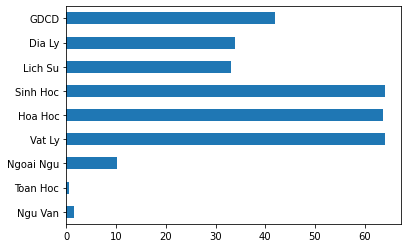

In [9]:
nume_col_profile_df.loc['missing_ratio'].plot.barh()

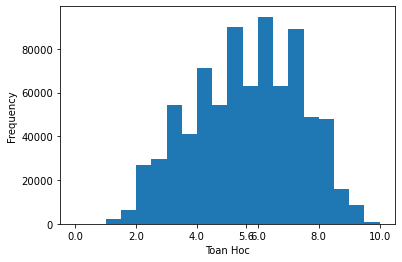

In [10]:
th_series = point_df["Toan Hoc"]
th_series.plot.hist(bins=20)
plt.xticks(list(range(0, 11,2)) + [round(th_series.mean(),1)])
plt.xlabel("Toan Hoc")
plt.show()

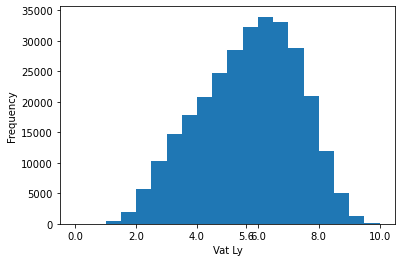

In [11]:
vl_series = point_df["Vat Ly"]
vl_series.plot.hist(bins=20)
plt.xticks(list(range(0, 11,2)) + [round(vl_series.mean(),1)])
plt.xlabel("Vat Ly")
plt.show()

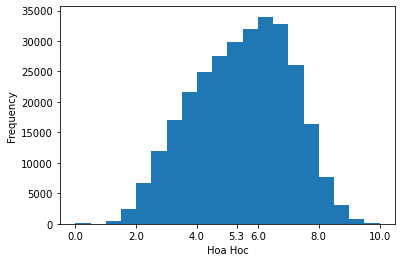

In [12]:
hh_series = point_df["Hoa Hoc"]
hh_series.plot.hist(bins=20)
plt.xticks(list(range(0, 11,2)) + [round(hh_series.mean(),1)])
plt.xlabel("Hoa Hoc")
plt.show()

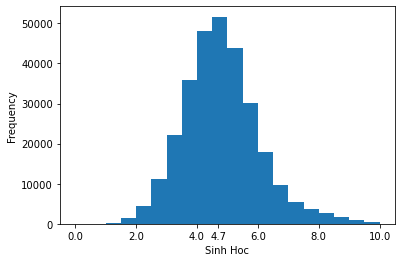

In [13]:
sh_series = point_df["Sinh Hoc"]
sh_series.plot.hist(bins=20)
plt.xticks(list(range(0, 11,2)) + [round(sh_series.mean(),1)])
plt.xlabel("Sinh Hoc")
plt.show()

## câu hỏi 1: phân loại học sinh theo giỏi toàn diện, lệch, trung bình, yếu 

lợi ích: cho thấy xu hướng chung thường thiên về một số môn hoặc theo hướng toàn diện.

Từ đó, điều chỉnh lại cách giảng dạy

In [14]:
point_df = point_df.set_index("SBD")
point_df["Toan Hoc"] = point_df["Toan Hoc"].replace(np.nan, 0)
point_df["Ngu Van"] = point_df["Ngu Van"].replace(np.nan, 0)
point_df["Ngoai Ngu"] = point_df["Ngoai Ngu"].replace(np.nan, 0)

In [15]:
score_df = point_df.drop(columns = ["Ma Ngoai Ngu", "Unnamed: 0"]).copy()

quy định rằng : 
- giỏi toàn diện: tổng điểm >= 7*số môn thi và điểm max và min cách biệt < 2
- lệch: tổng điểm >= số môn thi * 1 cách biệt giữa điểm max và min >= 2
- trung bình: tổng điểm >= 4*số môn thi và điểm max và min cách nhau nhỏ hơn 2 điểm
- yếu: còn lại

In [16]:
sum_score = score_df.sum(axis=1) + 0.05
chenh_lech = score_df.max(axis=1) - score_df.min(axis=1) 
so_mon_thi = score_df.notnull().sum(axis=1)
score_df.loc[(sum_score >= 4*so_mon_thi) & (chenh_lech < 2), "Phan loai"] = "Trung Binh"
score_df.loc[(sum_score >= 7*so_mon_thi) & (chenh_lech < 2), "Phan loai"] = "Gioi Toan Dien"
score_df.loc[(sum_score >= so_mon_thi) & (chenh_lech >= 2), "Phan loai"] = "Lech"
score_df.loc[score_df["Phan loai"].isnull(), "Phan loai"] = "Yeu"

In [17]:
score_df["Max diem"] = score_df.drop(columns = ["Phan loai"]).idxmax(axis = 1)
score_df["Min diem"] = score_df.drop(columns = ["Phan loai", "Max diem"]).idxmin(axis = 1)
score_df

,Ngu Van,Toan Hoc,Ngoai Ngu,Vat Ly,Hoa Hoc,Sinh Hoc,Lich Su,Dia Ly,GDCD,Phan loai,Max diem,Min diem
SBD,,,,,,,,,,,,
24008611,8.00,8.2,7.6,NaN,NaN,NaN,8.25,7.75,8.75,Gioi Toan Dien,GDCD,Ngoai Ngu
51000032,6.17,8.6,8.0,8.25,4.5,6.00,NaN,NaN,NaN,Lech,Toan Hoc,Hoa Hoc
51000005,4.75,5.2,0.0,NaN,NaN,NaN,4.00,4.25,5.75,Lech,GDCD,Ngoai Ngu
51000021,4.50,4.4,0.0,NaN,NaN,NaN,2.25,4.75,5.00,Lech,GDCD,Ngoai Ngu
51000013,6.00,5.8,4.4,NaN,NaN,NaN,7.75,8.25,7.50,Lech,Dia Ly,Ngoai Ngu
...,...,...,...,...,...,...,...,...,...,...,...,...
26019104,4.75,4.4,3.4,NaN,NaN,NaN,4.50,5.75,8.50,Lech,GDCD,Ngoai Ngu
26019102,6.25,5.2,4.4,3.75,4.5,4.00,NaN,NaN,NaN,Lech,Ngu Van,Vat Ly
26019099,5.00,2.8,2.8,NaN,NaN,NaN,5.50,5.50,8.00,Lech,GDCD,Toan Hoc


ta thấy tỉ lệ các học sinh học lệch là lớn nhất (khoảng 97%) còn học sinh Yeu, Trung binh và Gioi toan dien lần lượt là 4%, 2.2% và 0.34%. Như vậy, phần lớn các học sinh thường thiên về một số môn nhất định hơn là học dàn đều các môn

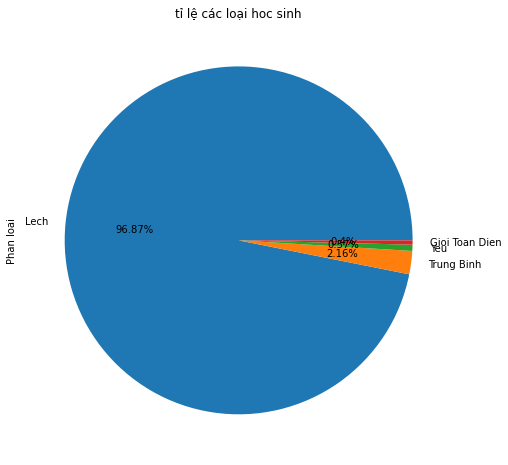

In [18]:
score_df["Phan loai"].value_counts().plot.pie(figsize=(8, 8), autopct=lambda x: str(round(x, 2)) + "%")
plt.title("tỉ lệ các loại hoc sinh")
plt.show()

In [19]:
score_df["Phan loai"].value_counts()

Lech              786454
Trung Binh         17504
Yeu                 4657
Gioi Toan Dien      3236
Name: Phan loai, dtype: int64

In [32]:
score_df.loc[score_df["Phan loai"] == "Lech", "Max diem"].value_counts()

GDCD         347197
Toan Hoc     177220
Dia Ly        94444
Ngu Van       75476
Ngoai Ngu     34234
Vat Ly        21292
Hoa Hoc       16266
Lich Su       13326
Sinh Hoc       6999
Name: Max diem, dtype: int64

In [31]:
score_df.loc[score_df["Phan loai"] == "Lech", "Min diem"].value_counts()

Ngoai Ngu    412016
Lich Su      131239
Sinh Hoc      69858
Ngu Van       51184
Toan Hoc      50498
Hoa Hoc       38589
Vat Ly        30103
Dia Ly         2769
GDCD            198
Name: Min diem, dtype: int64

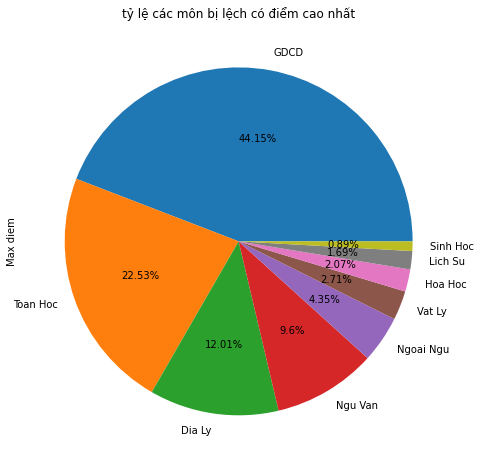

In [36]:
score_df.loc[score_df["Phan loai"] == "Lech", "Max diem"].value_counts().plot.pie(figsize=(8,8), autopct=lambda x: str(round(x, 2)) + "%")
plt.title("tỷ lệ các môn bị lệch có điểm cao nhất")
plt.show()

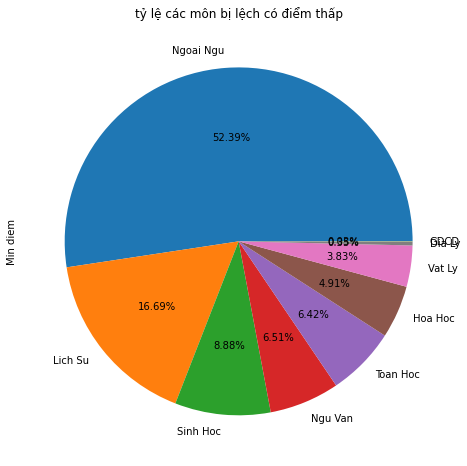

In [38]:
score_df.loc[score_df["Phan loai"] == "Lech", "Min diem"].value_counts().plot.pie(figsize=(8,8), autopct=lambda x: str(round(x, 2)) + "%")
plt.title("tỷ lệ các môn bị lệch có điểm thấp")
plt.show()

- Như ở trên, ta thấy các môn mà học sinh thường tập trung thì GDCD, Toán, Địa, Văn là những môn có nhiều điểm cao nhất, khác biệt rõ so với phần còn lai. Là do môn đó quá dễ hoặc là học sinh đã có chuẩn bị ?
- và trong số các môn có nhiều điểm thấp nhất là Ngoại ngữ, 1 trong 3 môn bắt buộc. Như vậy, có thể nói môn có độ khó cao hoặc là các thí sinh không tập trung chuẩn bị vào môn này.